In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
crime = pd.read_csv("data/CrimeData_new.csv")

In [23]:
crime.head()

,report_id,Crime.Subcategory,Primary.Offense.Description,Neighborhood,Date,timing
0,20080000465209,DUI,DUI-LIQUOR,CENTRAL AREA/SQUIRE PARK,12/1908,night
1,20100000202011,FAMILY OFFENSE-NONVIOLENT,CHILD-OTHER,QUEEN ANNE,06/1964,latenight
2,2012000023437,SEX OFFENSE-OTHER,SEXOFF-OTHER,NORTHGATE,01/1973,latenight
3,20130000327785,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,06/1974,latenight
4,20160000289384,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,01/1975,latenight


In [24]:
crime['Year'] = crime['Date'].str[3:7]

In [25]:
crime.head()

,report_id,Crime.Subcategory,Primary.Offense.Description,Neighborhood,Date,timing,Year
0,20080000465209,DUI,DUI-LIQUOR,CENTRAL AREA/SQUIRE PARK,12/1908,night,1908
1,20100000202011,FAMILY OFFENSE-NONVIOLENT,CHILD-OTHER,QUEEN ANNE,06/1964,latenight,1964
2,2012000023437,SEX OFFENSE-OTHER,SEXOFF-OTHER,NORTHGATE,01/1973,latenight,1973
3,20130000327785,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,06/1974,latenight,1974
4,20160000289384,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,01/1975,latenight,1975


In [26]:
total_crime = crime[['Year', 'report_id']].groupby('Year', as_index = False).count()

In [27]:
total_crime.rename(columns={'report_id': 'total_crime'})

,Year,total_crime
0,1908,1
1,1964,1
2,1973,1
3,1974,1
4,1975,2
5,1976,2
6,1977,1
7,1978,1
8,1979,2
9,1980,2


Text(0.5, 1.0, 'Total Crime by Year')

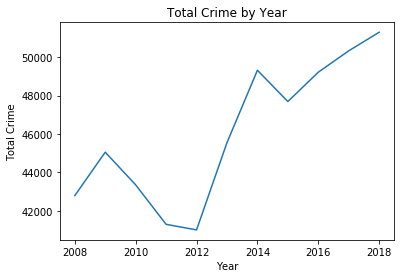

In [28]:
total_crime['Year'] = pd.to_numeric(total_crime['Year'])
total_crime_after_2008 = total_crime[(total_crime['Year'] > 2007) & (total_crime['Year'] < 2019)]
x = total_crime_after_2008['Year']
y = total_crime_after_2008['report_id']
plt.plot(x, y)
plt.xlabel("Year")
plt.ylabel("Total Crime")
plt.title("Total Crime by Year")

#significant rise in crime occurence from 2012 to 2014

In [29]:
total_crime_by_time = crime[['timing', 'report_id']].groupby('timing', as_index = False).count()

Text(0.5, 1.0, 'Crime Occurence in Each Part of the Day')

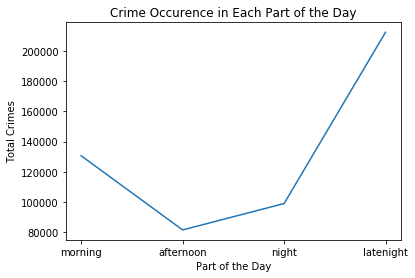

In [30]:
#morning: 5am-12pm; night: 12pm-5pm; night: 5pm-12am; latenight: 12am-5am
#lowest crime occurence during afternoons due to high exposure to public
x = ['morning', 'afternoon', 'night', 'latenight']
y = total_crime_by_time['report_id']
plt.plot(x, y)
plt.xlabel("Part of the Day")
plt.ylabel("Total Crimes")
plt.title("Crime Occurence in Each Part of the Day")

In [31]:
total_crime_by_time

,timing,report_id
0,afternoon,130636
1,latenight,81568
2,morning,99009
3,night,212376


In [32]:
total_crime_after_2008

,Year,report_id
33,2008,42793
34,2009,45056
35,2010,43353
36,2011,41298
37,2012,41007
38,2013,45551
39,2014,49322
40,2015,47693
41,2016,49220
42,2017,50334
